# Natural Language Processing
---------------------------------------------------

This example shows how to use ATOM to quickly go from raw text data to model predictions.

Import the 20 newsgroups text dataset from [sklearn.datasets](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html). The dataset comprises around 18000 articles on 20 topics. The goal is to predict the topic of every article.

## Load the data

In [1]:
import numpy as np
from atom import ATOMClassifier
from sklearn.datasets import fetch_20newsgroups

In [2]:
# Use only a subset of the available topics for faster processing
X_text, y_text = fetch_20newsgroups(
    return_X_y=True,
    categories=[
        'alt.atheism',
        'sci.med',
        # 'comp.windows.x',
        # 'misc.forsale',
        # 'rec.autos',
    ],
    shuffle=True,
    random_state=1,
)
X_text = np.array(X_text).reshape(-1, 1)

## Run the pipeline

In [3]:
atom = ATOMClassifier(X_text, y_text, test_size=0.3, verbose=2, warnings=False)

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (1074, 2)
Memory: 2.30 MB
Scaled: False
Categorical features: 1 (100.0%)
-------------------------------------
Train set size: 752
Test set size: 322
-------------------------------------
|   |     dataset |       train |        test |
| - | ----------- | ----------- | ----------- |
| 0 |   480 (1.0) |   336 (1.0) |   144 (1.0) |
| 1 |   594 (1.2) |   416 (1.2) |   178 (1.2) |



In [4]:
atom.dataset  # Note that the feature is automatically named 'corpus'

,corpus,target
0,From: jim.zisfein@factory.com (Jim Zisfein) \n...,1
1,From: bil@okcforum.osrhe.edu (Bill Conner)\nSu...,0
2,From: romdas@uclink.berkeley.edu (Ella I Baff)...,1
3,From: hrubin@pop.stat.purdue.edu (Herman Rubin...,1
4,Subject: Re: <Political Atheists?\nFrom: bobbe...,0
...,...,...
1069,From: tomca@microsoft.com (Tom B. Carey)\nSubj...,1
1070,From: dpw@sei.cmu.edu (David Wood)\nSubject: R...,0
1071,From: mccullou@snake2.cs.wisc.edu (Mark McCull...,0
1072,From: kiran@village.com (Kiran Wagle)\nSubject...,1


In [5]:
# Let's have a look at the first document
atom.corpus[0]

"From: jim.zisfein@factory.com (Jim Zisfein) \nSubject: klonopin and pregnancy\nDistribution: world\nOrganization: Invention Factory's BBS - New York City, NY - 212-274-8298v.32bis\nReply-To: jim.zisfein@factory.com (Jim Zisfein) \nLines: 17\n\nA(> From: adwright@iastate.edu ()\nA(> A woman I know is tapering off klonopin. I believe that is one of the\nA(> benzodiazopines. She is taking a very minimal dose right now, half a tablet\nA(> a day. She is also pregnant. My question is Are there any known cases where\nA(> klonopin or similar drug has caused harmful effects to the fetus?\nA(>  How about cases where the mother took klonopin or similar substance and had\nA(> normal baby. Any information is appreciated. She wants to get a feel for\nA(> what sort of risk she is taking. She is in her first month of pregnancy.\n\nKlonopin, according to the PDR (Physician's Desk Reference), is not a\nproven teratogen.  There are isolated case reports of malformations,\nbut it is impossible to establi

In [6]:
# Clean the documents from noise (emails, numbers, etc...)
atom.textclean()

Cleaning the corpus...
 --> Decoding unicode characters to ascii.
 --> Converting text to lower case.
 --> Dropping 4429 emails from 1070 documents.
 --> Dropping 0 URL links from 0 documents.
 --> Dropping 1116 HTML tags from 694 documents.
 --> Dropping 0 emojis from 0 documents.
 --> Dropping 6996 numbers from 1071 documents.
 --> Dropping punctuation from the text.


In [7]:
# Have a look at the removed items
atom.drops

,email,url,html,emoji,number
0,"[jim.zisfein@factory.com, jim.zisfein@factory....",NaN,NaN,NaN,"[212, 274, 17, 2, 1]"
1,"[bil@okcforum.osrhe.edu, edm@twisto.compaq.com...",NaN,[<ofnwyg600wb699voa=@andrew.cmu.edu>],NaN,"[1, 1, 17, 16, 93, 05, 10, 18]"
2,"[romdas@uclink.berkeley.edu, romdas@uclink.ber...",NaN,NaN,NaN,"[37, 1, 2, 90, 90, 3]"
3,"[hrubin@pop.stat.purdue.edu, 1qk92linnl55@im4u...",NaN,"[<>, <>]",NaN,"[28, 1399, 317, 494, 6054]"
4,"[bobbe@vice.ico.tek.com, 1993apr3.212139.14076...",NaN,"[<>, <1pj9bs$>]",NaN,[47]
...,...,...,...,...,...
1073,"[dyer@spdcc.com, 1993apr16.155123.447@cunews.c...",NaN,[<>],NaN,"[78, 27903, 20, 1988]"
356,NaN,NaN,[<pl1u+@andrew.cmu.edu>],NaN,[23]
890,NaN,NaN,[<lc2b+@andrew.cmu.edu>],NaN,[6]
850,NaN,NaN,NaN,NaN,[17]


In [8]:
# Check how the first document changed
atom.corpus[0]

'from  jim zisfein \nsubject klonopin and pregnancy\ndistribution world\norganization invention factorys bbs  new york city ny  898v32bis\nreplyto  jim zisfein \nlines \n\na from  \na a woman i know is tapering off klonopin i believe that is one of the\na benzodiazopines she is taking a very minimal dose right now half a tablet\na a day she is also pregnant my question is are there any known cases where\na klonopin or similar drug has caused harmful effects to the fetus\na  how about cases where the mother took klonopin or similar substance and had\na normal baby any information is appreciated she wants to get a feel for\na what sort of risk she is taking she is in her first month of pregnancy\n\nklonopin according to the pdr physicians desk reference is not a\nproven teratogen  there are isolated case reports of malformations\nbut it is impossible to establish causeeffect relationships  the\noverwhelming majority of women that take klonopin while pregnant have\nnormal babies\n\n  slmr

In [9]:
# Convert the strings to a sequence of words
atom.tokenize()

Tokenizing the corpus...


In [10]:
# Print the first few words of the first document
atom.corpus[0][:7]

['from', 'jim', 'zisfein', 'subject', 'klonopin', 'and', 'pregnancy']

In [11]:
# Normalize the text to a predefined standard
atom.normalize(stopwords="english", lemmatize=True)

Normalizing the corpus...
 --> Dropping stopwords.
 --> Applying lemmatization.


In [12]:
atom.corpus[0][:7]  # Check changes...

['jim', 'zisfein', 'subject', 'klonopin', 'pregnancy', 'distribution', 'world']

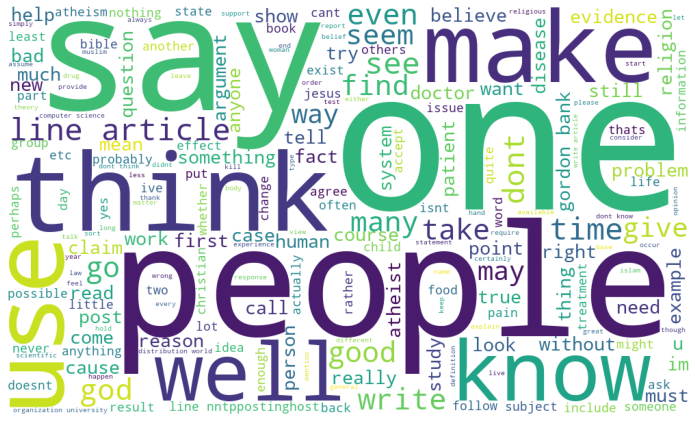

In [13]:
# Visualize the most common words with a wordcloud
atom.plot_wordcloud()

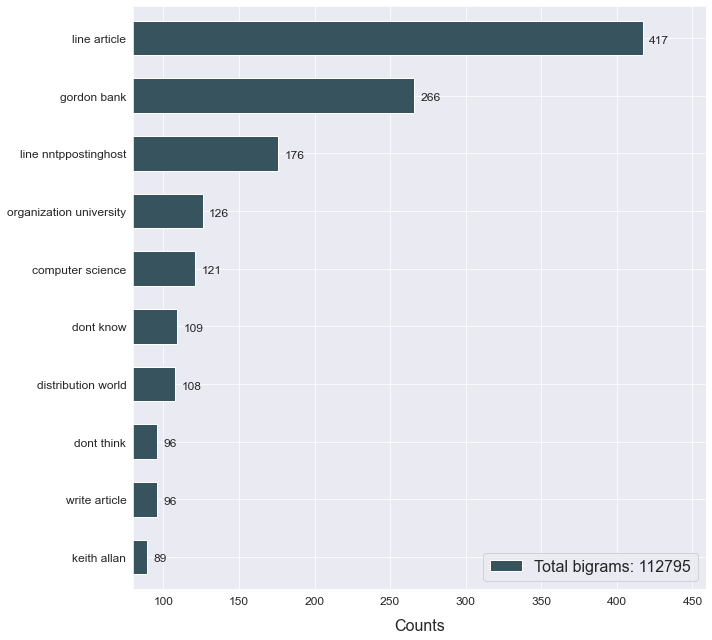

In [14]:
# Have a look at the most frequent bigrams
atom.plot_ngrams(2)

In [15]:
# Create the bigrams using the tokenizer
atom.tokenize(bigram_freq=215)

Tokenizing the corpus...
 --> Creating 2 bigrams on 683 locations.


In [16]:
atom.bigrams

,bigram,frequency
0,line_article,417
1,gordon_bank,266


In [17]:
# As a last step before modelling, convert the words to vectors
atom.vectorize(strategy="tfidf")

Fitting Vectorizer...
Vectorizing the corpus...


In [18]:
# The dimensionality of the dataset has increased a lot!
atom.shape

(1074, 14063)

In [19]:
# Note that the data is sparse and the columns are named
# after the words they are embedding
atom.dtypes

0000am     Sparse[float64, 0]
0030pm     Sparse[float64, 0]
0045pm     Sparse[float64, 0]
00am       Sparse[float64, 0]
00pm       Sparse[float64, 0]
                  ...        
zvonko     Sparse[float64, 0]
zyklonb    Sparse[float64, 0]
zz         Sparse[float64, 0]
zzzs       Sparse[float64, 0]
target                  int64
Length: 14063, dtype: object

In [20]:
# When the dataset is sparse, stats() shows the sparsity
atom.stats()

Dataset stats ==================== >>
Shape: (1074, 14063)
Memory: 1.39 MB
Sparse: True
Density: 0.76%
-------------------------------------
Train set size: 752
Test set size: 322
-------------------------------------
|   |     dataset |       train |        test |
| - | ----------- | ----------- | ----------- |
| 0 |   480 (1.0) |   336 (1.0) |   144 (1.0) |
| 1 |   594 (1.2) |   416 (1.2) |   178 (1.2) |


In [21]:
# Check which models have support for sparse matrices
atom.available_models()[["acronym", "fullname", "accepts_sparse"]]

,acronym,fullname,accepts_sparse
0,Dummy,Dummy Estimator,False
1,GP,Gaussian Process,False
2,GNB,Gaussian Naive Bayes,False
3,MNB,Multinomial Naive Bayes,True
4,BNB,Bernoulli Naive Bayes,True
5,CatNB,Categorical Naive Bayes,True
6,CNB,Complement Naive Bayes,True
7,Ridge,Ridge Estimator,True
8,Perc,Perceptron,False
9,LR,Logistic Regression,True


In [22]:
# Train the model
atom.run(models="MLP", metric="f1_weighted")


Training ========================= >>
Models: MLP
Metric: f1_weighted


Results for Multi-layer Perceptron:
Fit ---------------------------------------------
Train evaluation --> f1_weighted: 1.0
Test evaluation --> f1_weighted: 0.9938
Time elapsed: 28.960s
-------------------------------------------------
Total time: 28.960s


Final results ==================== >>
Duration: 28.961s
-------------------------------------
Multi-layer Perceptron --> f1_weighted: 0.9938


## Analyze results

In [23]:
atom.evaluate()

,accuracy,average_precision,balanced_accuracy,f1,jaccard,matthews_corrcoef,precision,recall,roc_auc
MLP,0.993789,0.999336,0.993056,0.994413,0.988889,0.987499,0.988889,1.0,0.99922


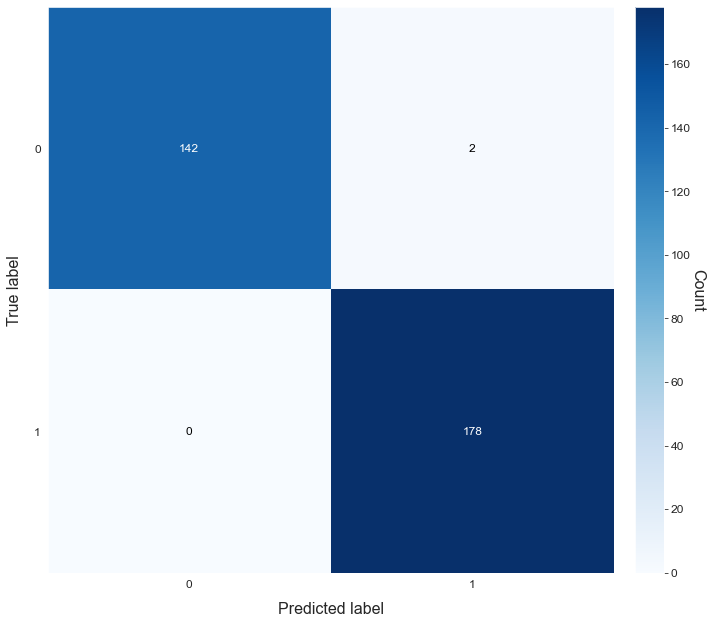

In [24]:
atom.plot_confusion_matrix(figsize=(10, 10))

In [25]:
atom.shape

(1074, 14063)

In [26]:
atom.predict(0)

1

MemoryError: Unable to allocate 91.2 GiB for an array with shape (870100, 14062) and data type float64

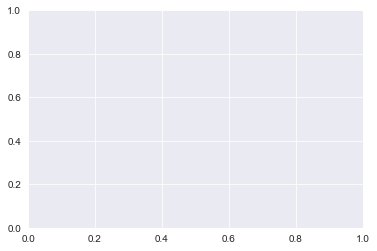

In [27]:
atom.decision_plot(index=0, target=0, show=10)